#  <span style="color:dodgerblue"> **Labo 6 - Correlatie en lineaire regressie**

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

## <span style="color:darkorange"> **Voorbeeld - heart disease**
Voor meer uitleg over de gebruikte dataset kan je terecht op: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/data

In [35]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### <span style="color:deeppink"> **Data exploration**

Gebruik de functie `dataset.describe()` zijn er opvallende waarden te zien?

In [36]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### <span style="color:deeppink"> **Berekenen correlatiecoefficienten**
Bereken de correlatiecoefficienten van de volledige dataset met behulp van de functie: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html  
(je hoeft geen parameters mee te geven, de standaard parameters zijn voldoende)  
sla dit op onder een variabele met de naam `correlatiecoefficienten`

In [37]:
corr = dataset.corr()

#### <span style="color:deeppink"> **Heatmap**
Visualiseer de onderlinge correlatiecoëfficiënten mbv de functie: https://seaborn.pydata.org/generated/seaborn.heatmap.html
De mee te geven parameters zijn:  
| Parameter | wat mee te geven|
| --- | --- | 
| data | de eerder berekende correlatiecoefficienten|
| square | True |
| annot | True |

<AxesSubplot:>

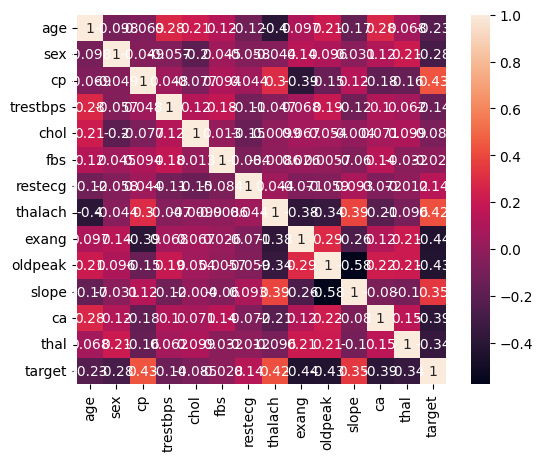

In [38]:
sns.heatmap(data=corr,square=True,annot=True)

Deze plot valt echter nogal klein uit en is dus moeilijk te lezen, gelukkig kan er gebruik gemaakt worden van `plt.figure()` om de grootte van de figuur aan te passen:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html  
(Voorbeeld hoe je het kunt gebruiken: https://stackabuse.com/change-figure-size-in-matplotlib/)  


<AxesSubplot:>

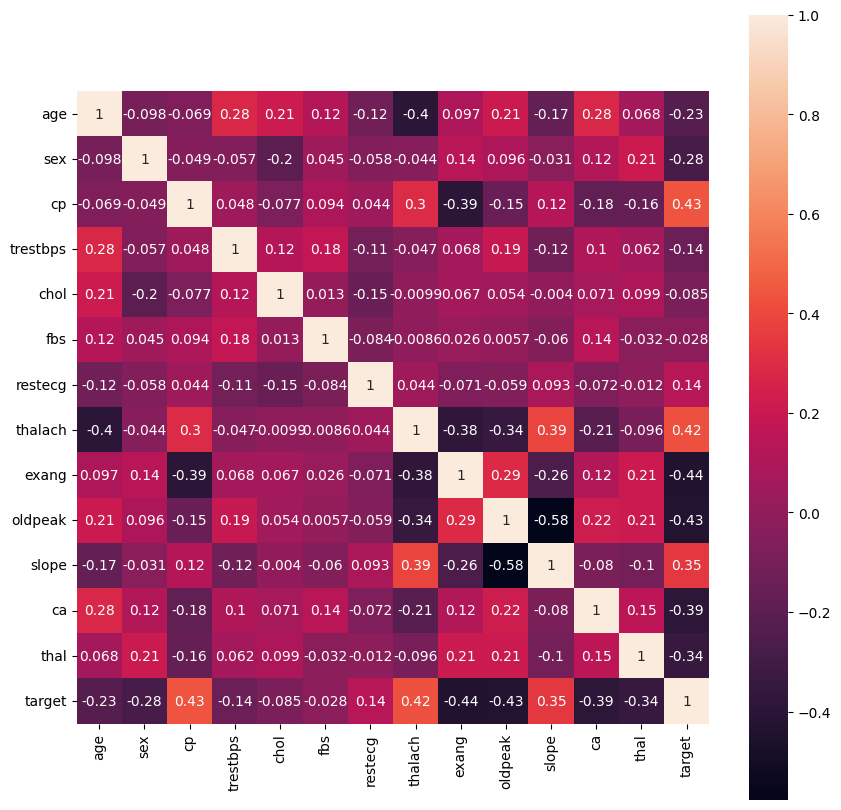

In [39]:
plt.figure(figsize=(10.2,10.2))
sns.heatmap(data=corr,square=True,annot=True)


#### <span style="color:deeppink"> **Individuele correlatiecoefficient**
Bereken de correlatiecoefficient tussen age en thalach (maximum heart rate achieved) maak gebruik van:  
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  
| Parameter | wat mee te geven|
| --- | --- | 
| x |De kolom met de onafhankelijke variabele|
| y |De kolom met de afhankelijke variabele |


In [40]:
np.corrcoef(x=dataset['thalach'],y=dataset['age'])

array([[ 1.        , -0.39852194],
       [-0.39852194,  1.        ]])

#### <span style="color:deeppink"> **Pairplot**
Maak gebruik van de volgende functie om de pairplot te maken:  
https://seaborn.pydata.org/generated/seaborn.pairplot.html  
Je hoeft enkel je dataset mee te geven (het is normaal dat dit even duurt om te genereren)

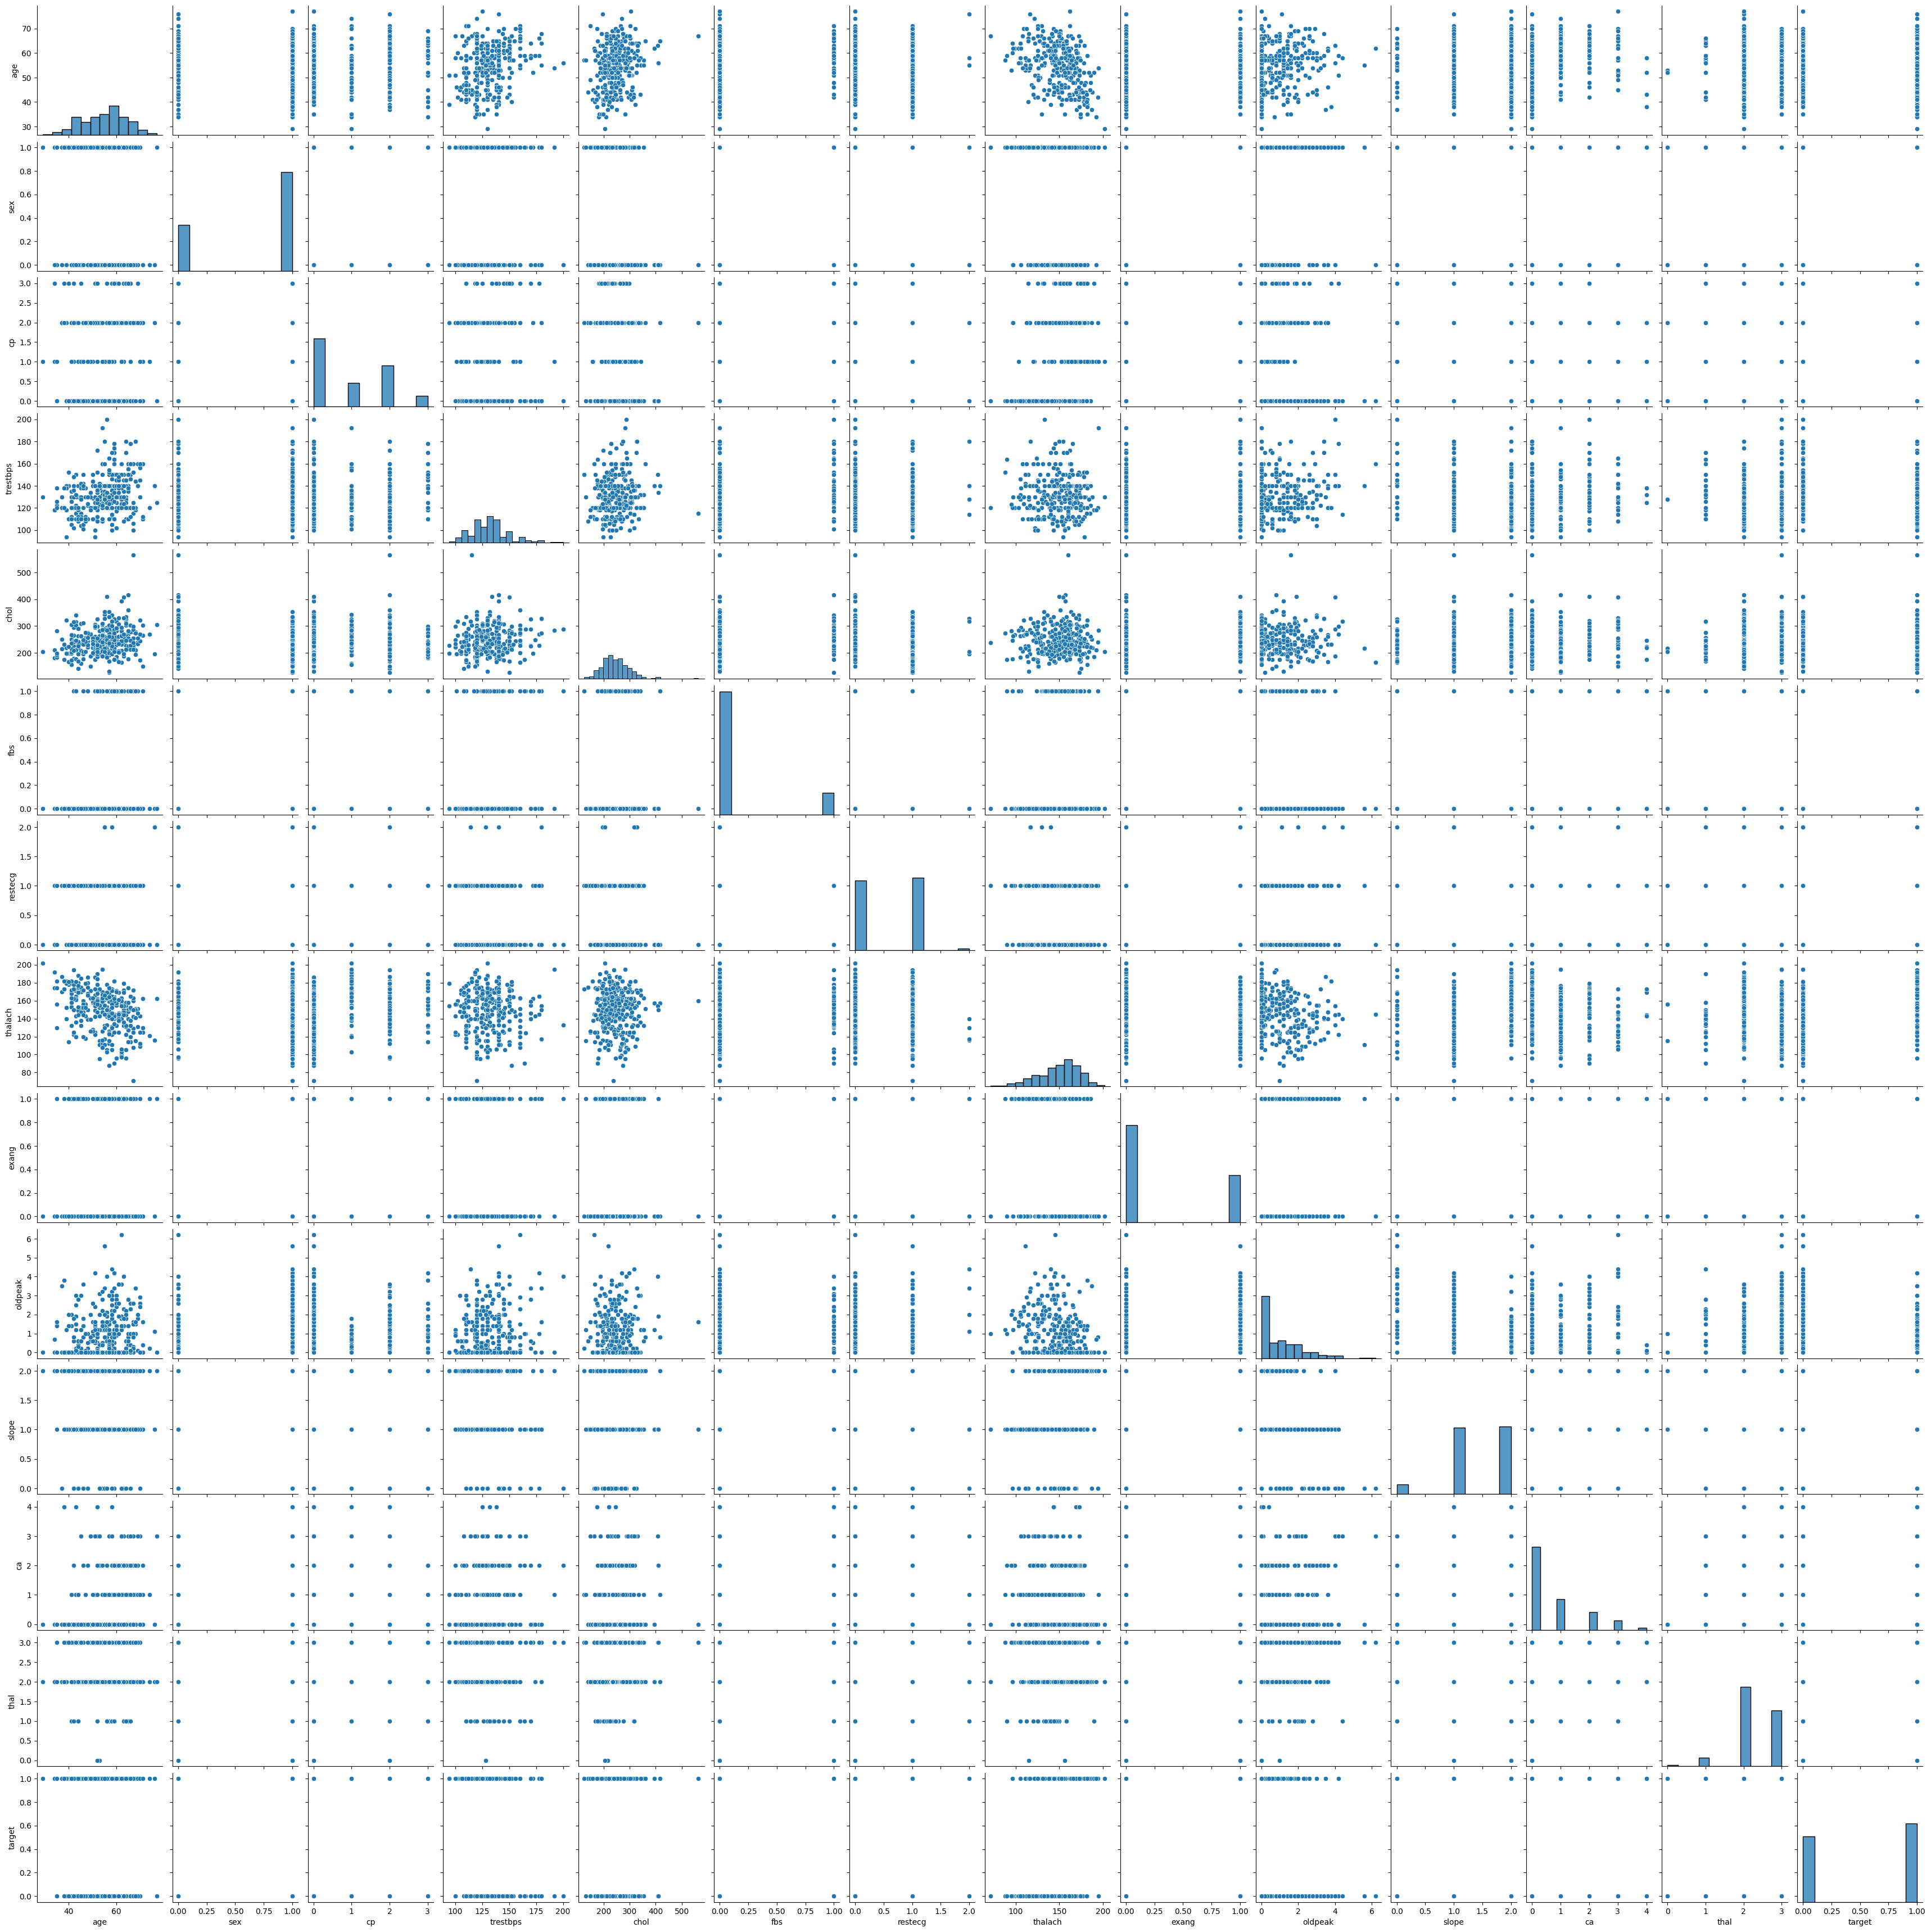

In [41]:
sns.pairplot(dataset)

#### <span style="color:deeppink"> **Scatterplot**
Maak een scatterplot waar de kolom 'age' de onafhankelijke variabele is en 'thalach' (maximale hartslag) de afhankelijke variabele.  
https://seaborn.pydata.org/generated/seaborn.scatterplot.html  
Vergeet niet je plot een titel te geven!
(je kunt ook als je wilt spelen met de parameters size en color)

Text(0.5, 1.0, 'Age en thalach')

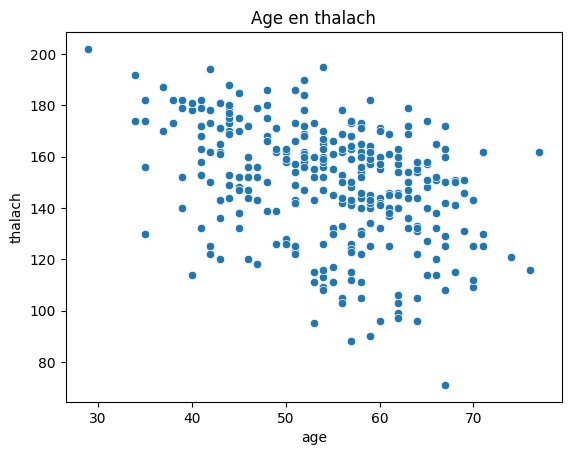

In [42]:
sns.scatterplot(x=dataset['age'],y=dataset['thalach'])
plt.title('Age en thalach')

Maak een scatterplot waar de kolom 'age' de onafhankelijke variabele is en 'thalach' (maximale hartslag) de afhankelijke variabele opgesplitst per geslacht (welke parameter zou je hiervoor kunnen aanpassen?)

<AxesSubplot:xlabel='age', ylabel='thalach'>

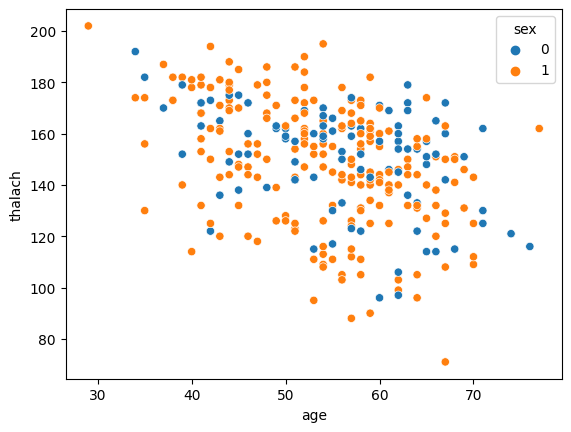

In [47]:
sns.scatterplot(x='age', y='thalach', data=dataset,hue = 'sex')

#### <span style="color:deeppink"> **Tekenen van de regressielijn tussen 'age' en 'thalach'**
Bekijk het filmpje op leho genaamd: fitten_regressielijn_en_plotten  
Hier vinden jullie de verschillende stappen en extra uitleg over hoe je de optimale regressielijn kan vinden.

In [57]:
from sklearn.linear_model import LinearRegression
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    x = dataset[x].values
    y = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(x.reshape(-1,1), y)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='black',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='red',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

Plotten van de regressielijn

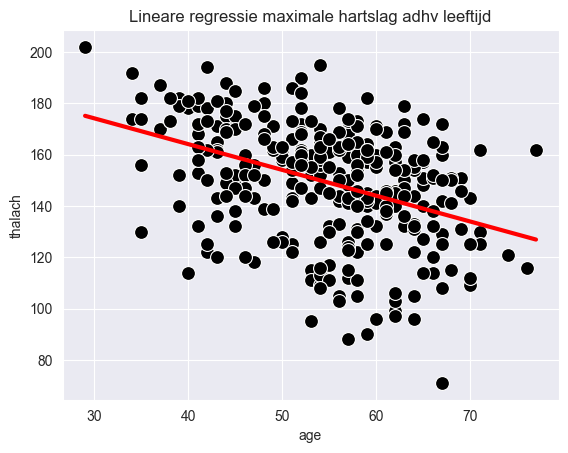

In [61]:
line = find_regressionline(dataset, 'age', 'thalach')
plot_regressionline(dataset, 'age', 'thalach', line, 'Lineare regressie maximale hartslag adhv leeftijd')

Voorspellen van de maximale hartslag van iemand met een leeftijd van 80 jaar

In [63]:
score = line.score(dataset['age'].values.reshape(-1,1), dataset['thalach'])
print(f'de score is {score}')

de score is 0.158819735163772


Bepalen van de determinatiecoëfficiënt (r²-score)

In [64]:
x_value= np.array([[80]])
cholesterol = line.predict(x_value)

print('De voorspelde maximale hartslag bedraagt: ',cholesterol[0])

De voorspelde maximale hartslag bedraagt:  123.88306377248466


#### <span style="color:deeppink">  **Maak nu 2 functies gebruik makend van de voorgaande code:**  
#### `find_regressionline()`  

| Parameter | wat mee te geven| datatype
| --- | --- | --- |
| data | dataframe | pd.DataFrame |
| x |De kolomnaam van de onafhankelijke variabele| string |
| y |De kolomnaam de afhankelijke variabele | string |

return value: regressielijn

=> door de regressielijn als return value terug te geven kun je later de coeficients, de intercept, de determinatiecoefficient, ... opvragen en er voorspellingen mee te gaan doen.
(indien gewenst kun je dit ook in een 3de functie gieten)

#### `plot_regressionline()`  

| Parameter | wat mee te geven| datatype
| --- | --- | --- |
| data | dataframe | pd.DataFrame |
| x |De kolomnaam van de onafhankelijke variabele| string |
| y |De kolomnaam de afhankelijke variabele | string |
| regressielijn| De gevonden regressielijn | LinearRegression|
|titel | De titel van de plot | string |

Deze functie moet de scatterplot plotten en de lineplot

Het aanmaken van deze 2 functies zal je veel werk besparen tijdens de rest van dit labo/ de opdracht / het examen


In [ ]:
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    x = dataset[x].values
    y = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(x.reshape(-1,1), y)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='black',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='red',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

#### <span style="color:deeppink"> **Kan je een betere voorspelling van de maximale hartslag aan de hand van de leeftijd doen indien je het geslacht in rekening brengt?**
Maw: gebruik de voordien gemaakte functies om de maximale hartslag te voorspellen opgesplitst per geslacht.  
Bepaal eerst de regressielijn voor de mannen, plot de regressielijn en bekijk de determinatiecoefficient.  
Doe dan hetzelfde voor de vrouwen, zijn de resultaten beter of slechter nadat ze opgesplitst zijn?  


In [65]:
# Mannen
mannen = dataset[dataset.sex==0]

regressielijn_mannen = find_regressionline(mannen, 'age', 'thalach')
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1),mannen['thalach'])
print(mannen_score)
print(regressielijn_mannen.intercept_)
print(regressielijn_mannen.coef_[0])

0.16435189894344937
199.2169594590411
-0.8637657826132733


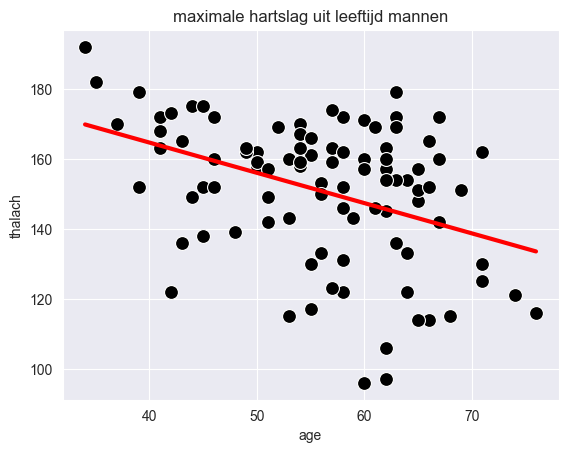

In [66]:
plot_regressionline(mannen, 'age', 'thalach', regressielijn_mannen, 'maximale hartslag uit leeftijd mannen')


In [67]:
# Vrouwen
vrouwen = dataset[dataset.sex==1]

regresielijn_vrouwen = find_regressionline(vrouwen, 'age', 'thalach')
print("intercept: ", regresielijn_vrouwen.intercept_)
print("rico: ",regresielijn_vrouwen.coef_[0])
score = regresielijn_vrouwen.score(vrouwen.age.values.reshape(-1,1), vrouwen.thalach.values)
print("R-squared value vrouwen: ", round(score, 2))

intercept:  208.62542706788815
rico:  -1.1098547270895802
R-squared value vrouwen:  0.17


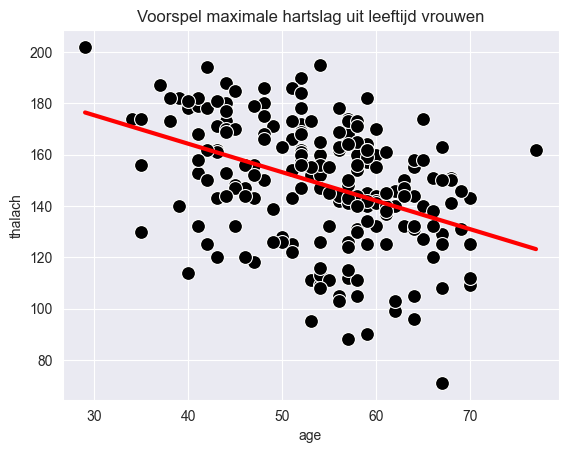

In [68]:
plot_regressionline(vrouwen, 'age', 'thalach', regresielijn_vrouwen, 'Voorspel maximale hartslag uit leeftijd vrouwen')


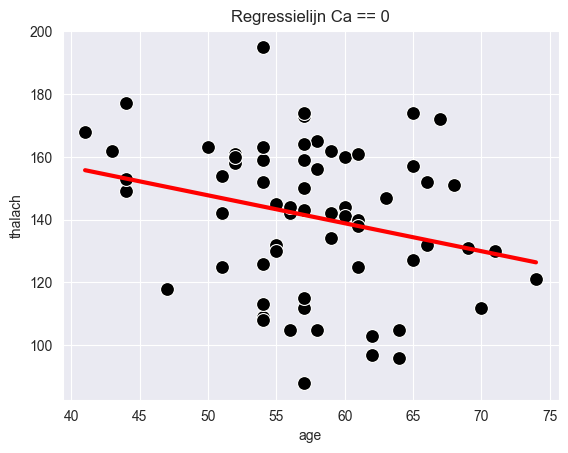

In [69]:
ca_val = 1 # varieer tussen 0 en 3

df = dataset[dataset.ca ==ca_val ]

regressielijn_ca_0 = find_regressionline(df, 'age', 'thalach')
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_0, "Regressielijn Ca == 0")

#### <span style="color:deeppink"> **Voorspelling van de maximale hartslag opgesplitst per ca (number of major vessels (0-3) colored by flourosopy**


In [70]:
score = regressielijn_ca_0.score(df['age'].values.reshape(-1,1), df['thalach'])
print(round(score, 2))

0.07
